In [1]:
!pip install -Uqq fastai

In [2]:
!pip install -Uqq duckduckgo_search==6.2.11b1

In [9]:
from duckduckgo_search import DDGS
from fastai.vision.utils import download_images, verify_images
from fastai.vision.widgets import get_image_files
from fastai.imports import * # Path is not found for some reason
from fastai.vision.augment import aug_transforms
import os

In [33]:
race_characters = {
    'Ainur': ['Gandalf', 'Saruman', 'Sauron'],
    'Balrogs': ['Durins Bane', 'balrog'],
    'Dwarves': ['Gimli', 'Thorin', 'dwarf'],
    'Elves': ['Legolas', 'Galadriel', 'Elrond'],
    'Ents': ['Treebeard', 'ent', 'ent tree'],
    'Half-elves': ['Arwen', 'Elrond', 'Isildur'],
    'Hobbits': ['Frodo', 'Samwise', 'Merry'],
    'Men': ['Aragorn', 'Boromir', 'Théoden'],
    'Orcs': ['Azog', 'Gorbag', 'orc'],
    'Trolls': ['Cave Troll', 'Olog-hai', 'troll'],
    'no-middle-earth': ['caucasian', 'mongoloid', 'negroid', 'australoid', 'amerindian', 'pacific islander']
}


def fetch_images_for_race():
    for race, characters in race_characters.items():
        folder = f"./{race}"
        if not os.path.exists(folder):
            os.makedirs(folder)
        
        for character in characters:
            results = DDGS().images(
                keywords=f"{character} lotr movie face" if race != 'no-middle-earth' else f"{character} face",
                region="wt-wt",
                safesearch="off",
                type_image="photo",
                max_results=50 if race != 'No Middle Earth' else 25,
            )
            
            urls = [image['image'] for image in results]
            download_images(folder, urls=urls)

fetch_images_for_race()


In [5]:
failed = verify_images(get_image_files('.'))
failed.map(Path.unlink)
len(failed)

0

In [10]:
from fastai.vision.all import ImageDataLoaders, Resize
from fastai.data.transforms import parent_label

fns = get_image_files('.')
dls = ImageDataLoaders.from_path_func(path='.', fnames=fns, label_func=parent_label ,valid_pct=0.2, seed=42, item_tfms=Resize(152), batch_tfms=aug_transforms)

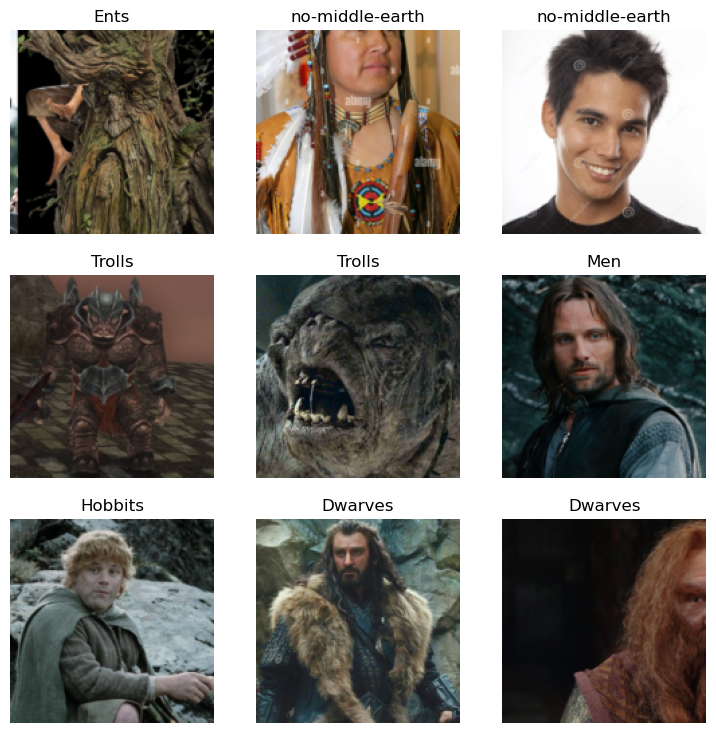

In [12]:
dls.show_batch()

In [17]:
from fastai.vision.models import resnet18
from fastai.vision.learner import vision_learner, error_rate

learner = vision_learner(dls, resnet18, metrics=error_rate)

In [1]:
# learner.fine_tune(1) slow, do in Kaggle the rest https://www.kaggle.com/code/savagerov/training-a-model-lotr/edit